In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Create and visualize data

length of train, test set: 160, 40


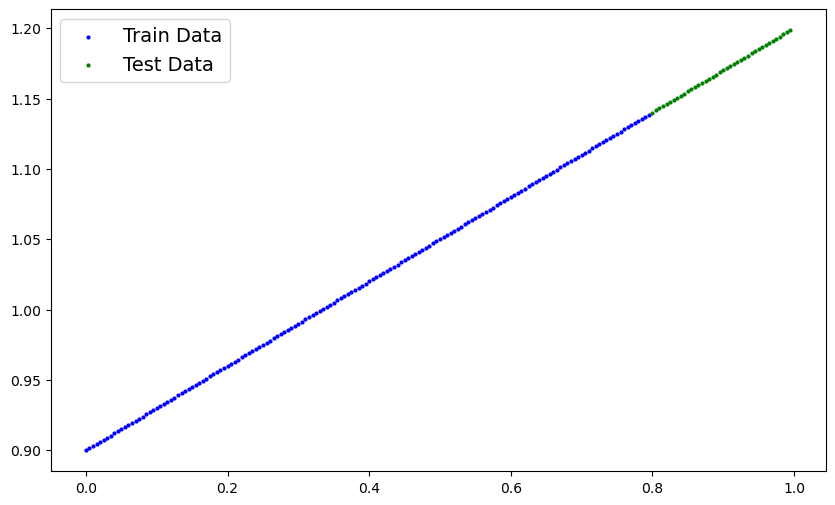

In [9]:
# Create a straight line dataset using the linear regression formula (weight * X + bias).
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
# Split the data into 80% training, 20% testing.
# Plot the training and testing data so it becomes visual.

# create data
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.005
X = torch.arange(start, end, step, dtype=torch.float)
y = weight * X + bias

# split data
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f'length of train, test set: {len(X_train)}, {len(X_test)}')

# visualize data
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    # set figure size
    plt.figure(figsize=(10, 6))
    # plot train data
    plt.scatter(train_data, train_labels, s = 4, c = 'b', label = 'Train Data')
    # plot test data
    plt.scatter(test_data, test_labels, s = 4, c = 'g', label = 'Test Data')

    # plot predictions if it exists
    if predictions is not None:
        plt.scatter(test_data, predictions, s = 4, c = 'r', label = 'Predictions')

    plt.legend(prop = ({'size': 14}))

plot_prediction()


## 2. Create model 

In [17]:

# Build a PyTorch model by subclassing nn.Module.
# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
# Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
# Once you've constructed the model, make an instance of it and check its state_dict().
# Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # parameters 
        self.weights = nn.Parameter(torch.randn(1, dtype=float), requires_grad= True)
        self.bias = nn.Parameter(torch.randn(1, dtype=float), requires_grad= True)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return X * self.weights + self.bias

In [14]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([-0.7788], dtype=torch.float64)),
             ('bias', tensor([-0.4592], dtype=torch.float64))])

## 3. Create loss function and optimizer

In [19]:
# Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
# Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
# Write a training loop to perform the appropriate training steps for 300 epochs.
# The training loop should test the model on the test dataset every 20 epochs.

loss_fn  = nn.L1Loss()
optimizer = torch.optim.SGD(params= model.parameters(),
                            lr = 0.01)

In [20]:
epochs = 300
for i in range(epochs):
    # train model
    model.train()
    # make train predictions
    y_preds = model(X_train)
    # calculate loss
    loss = loss_fn(y_preds, y_train)
    # optimize zero grad
    optimizer.zero_grad()
    # loss backward, compute the gradients
    loss.backward()
    # update the weight and bias
    optimizer.step()

    # Testing
    # put the model into evaulation mode
    model.eval()
    
    if i % 20 == 0:
        with torch.inference_mode():
            y_preds = model(X_test)
            test_loss = loss_fn(y_preds, y_test)

            print(f'Epoch {i} | Train loss: {loss} | Test loss {test_loss}')

Epoch 0 | Train loss: 1.7879851326891454 | Test loss 2.3138298392500265
Epoch 20 | Train loss: 1.5563838832411148 | Test loss 2.042478590394404
Epoch 40 | Train loss: 1.324782633793084 | Test loss 1.7711273415387823
Epoch 60 | Train loss: 1.0931813843450535 | Test loss 1.49977609268316
Epoch 80 | Train loss: 0.8615801348970227 | Test loss 1.2284248438275376
Epoch 100 | Train loss: 0.6299788854489917 | Test loss 0.9570735949719154
Epoch 120 | Train loss: 0.39837763600096093 | Test loss 0.6857223461162932
Epoch 140 | Train loss: 0.17367359505392505 | Test loss 0.4196133331958434
Epoch 160 | Train loss: 0.095770571242119 | Test loss 0.26463913409991824
Epoch 180 | Train loss: 0.08117925345574348 | Test loss 0.20292625500906233
Epoch 200 | Train loss: 0.07380107051143467 | Test loss 0.1750412322402161
Epoch 220 | Train loss: 0.0669335080738119 | Test loss 0.15658684072958334
Epoch 240 | Train loss: 0.06009374075463865 | Test loss 0.14037672423234682
Epoch 260 | Train loss: 0.05325419885927

## 4. Make predictions

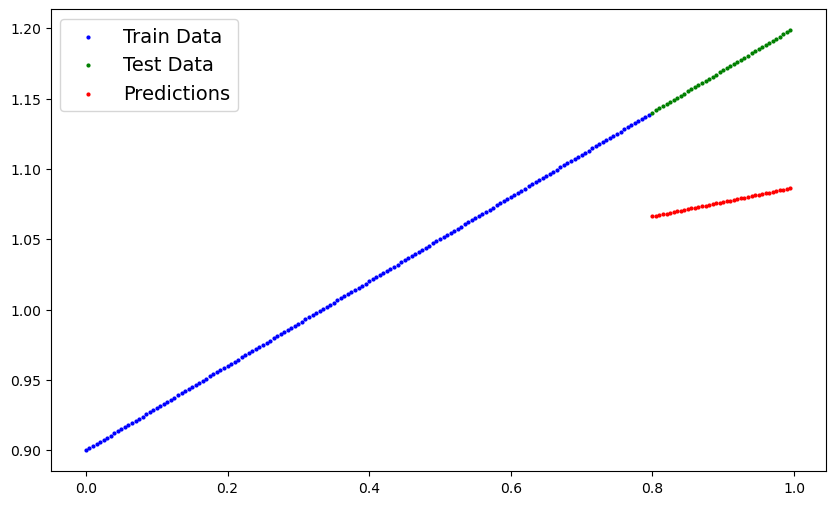

In [30]:
# Make predictions with the trained model on the test data.
# Visualize these predictions against the original training and testing data (note: you may need to make sure 
# the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
with torch.inference_mode():
    y_preds = model(X_test)
    plot_prediction(predictions=y_preds)


## 5. Save the model 

In [32]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_practice_model_v0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_practice_model_v0.pth


In [33]:
model.state_dict()

OrderedDict([('weights', tensor([0.1031], dtype=torch.float64)),
             ('bias', tensor([0.9837], dtype=torch.float64))])